Coefficient Of Determination = 0.9405251327620537
max difference [73353.27956989]
Pearsons correlation: 0.970


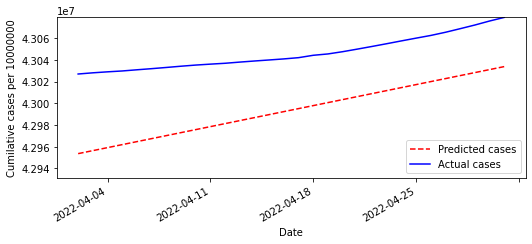

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr

#plt.rcParams["figure.figsize"] = [7.50, 3.50]
#plt.rcParams["figure.autolayout"] = True

df = pd.read_csv('covid_data.csv')

cases=df[["Country","Date_reported","Cumulative_cases"]]

da=cases.loc[cases['Country'] == 'India']
db=da.loc[da['Date_reported']>'2022-03-01']
db=db.loc[db['Date_reported']<'2022-04-01']

da=da.loc[da['Date_reported'] > '2022-04-01']
da=da.loc[da['Date_reported'] < '2022-05-02']
x = range(0,60)
l = range(0,30)
da['index']=l
db['index']=l

arr = da.iloc[:,1]
y = da["Cumulative_cases"]
X = db.iloc[:, 3].values.reshape(-1, 1)  # values converts it into a numpy array
Y = db.iloc[:, 2].values.reshape(-1, 1)
X1 = da.iloc[:, 3].values.reshape(-1, 1) 
Y1 = da.iloc[:, 2].values.reshape(-1, 1)   # -1 means that calculate the dimension of rows, but have 1 column

linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
r_sq=linear_regressor.score(X,Y)
print("Coefficient Of Determination =",r_sq)
Y_pred = linear_regressor.predict(X)  # make prediction
YM=Y.flatten()
XM=X.flatten()
plt.plot(arr, Y_pred, 'r--',label='Predicted cases')
plt.plot(arr,Y1,color='blue',label='Actual cases')
# get the current figure.
current_figure = plt.gcf()
# Change the tick interval
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
leg = plt.legend(loc='lower right')
plt.ylim(42931045,43079188)
dis=max(Y1-Y_pred)
print("max difference",dis)
# make the datetime displayed adaptively.
current_figure.autofmt_xdate()
corr, _ = pearsonr(YM, XM)
plt.ylabel("Cumilative cases per 10000000")
plt.xlabel("Date")
print('Pearsons correlation: %.3f' % corr)

plt.show()
